In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'E:\semester 6\Machine Learning\project\Social_Network_Ads.csv')

X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
print(X.head())
print()
print(y.head())

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_linear = SVC(kernel='linear')
svm_poly2 = SVC(kernel='poly', degree=2)
svm_rbf = SVC(kernel='rbf')

models = {
    'Linear Kernel': svm_linear,
    'Polynomial Kernel (deg=2)': svm_poly2,
    'RBF Kernel': svm_rbf
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

Linear Kernel Accuracy: 0.85
Polynomial Kernel (deg=2) Accuracy: 0.80
RBF Kernel Accuracy: 0.94


In [6]:
import matplotlib.pyplot as plt


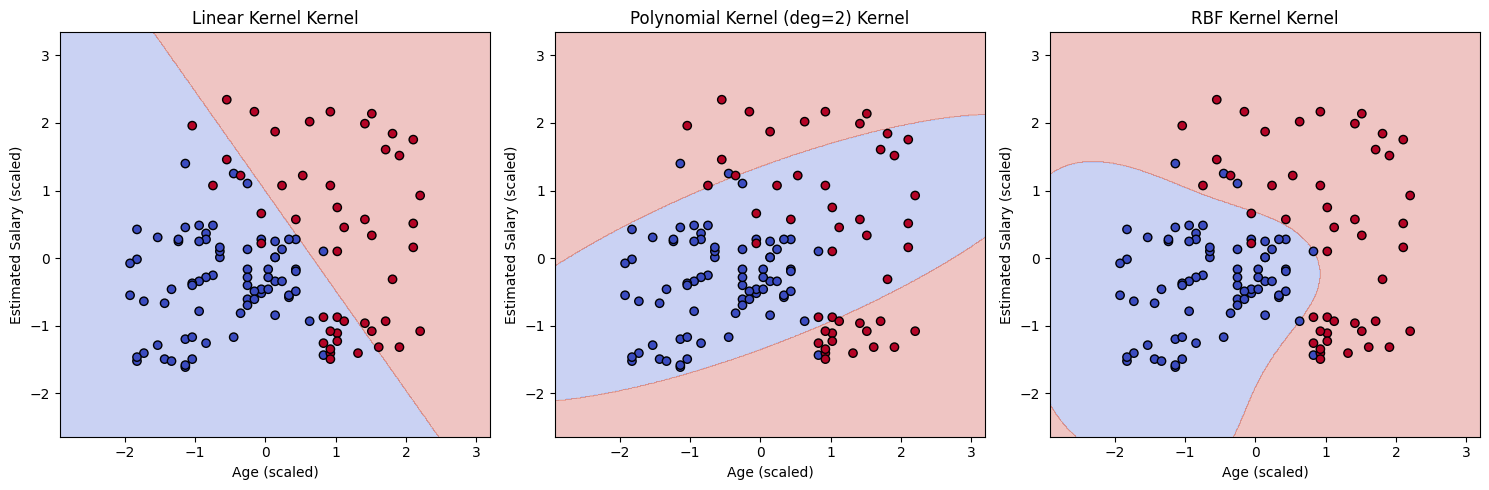

In [7]:
h = 0.01
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# 4. Plot decision boundaries
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    Z = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f'{name} Kernel')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
plt.tight_layout()
plt.show()

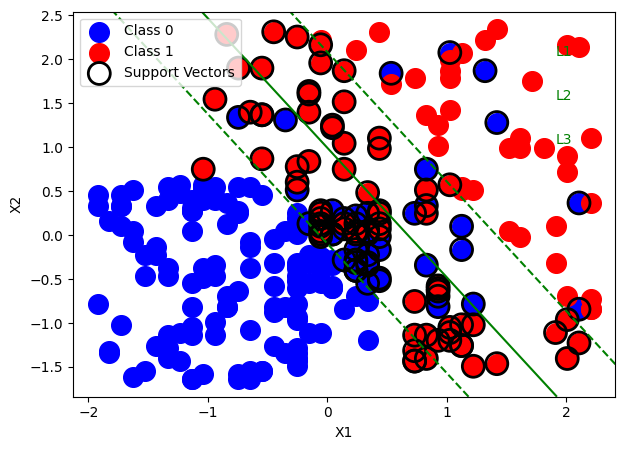

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Use your actual data and trained model
X = X_train_scaled
y = y_train
model = svm_linear  # or svm_poly2, svm_rbf, etc.

plt.figure(figsize=(7, 5))

# Plot data points
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', s=200, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', s=200, label='Class 1')

# Plot decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Decision boundary (L2) and margins (L1, L3)
contours = ax.contour(XX, YY, Z, colors='green', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
ax.annotate('L1', xy=(xlim[1]-0.5, ylim[1]-0.5), color='green')
ax.annotate('L2', xy=(xlim[1]-0.5, ylim[1]-1.0), color='green')
ax.annotate('L3', xy=(xlim[1]-0.5, ylim[1]-1.5), color='green')

# Highlight support vectors (no arrows)
support_vectors = model.support_vectors_
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=250, linewidth=2, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()